In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = [338, 333, 328, 207, 226, 25, 179, 60, 208, 606]
y_data = [640, 633, 619, 393, 428, 27, 193, 66, 226, 159]

In [10]:
x = np.arange(-200, -100, 1) #bias
y = np.arange(-5, 5, 0.1) # weight
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] + (y_data[n] - b - w*x_data[n]) ** 2
        Z[j][i] = Z[j][i]/len(x_data)

[-123, -122.9999, -122.99982928987575, -122.9997715555767, -122.99972155638865]
[-4, -3.9999, -3.999829289868943, -3.9997715555609377, -3.9997215563628945]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: The following kwargs were not used by contour: 'camp'


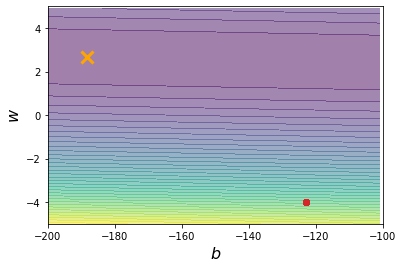

In [30]:
# y_data = b + w * xdata
b = -123
w = -4
lr = 0.0001 # learning rate
iteration = 1000

b_history = [b]
w_history = [w]

lr_b = 0
lr_w = 0

for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0 * (y_data[n] -b - w*x_data[n]) * 1.0
        w_grad = w_grad - 2.0 * (y_data[n] -b - w*x_data[n]) * x_data[n]
        
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
        
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w)  * w_grad
    
    b_history.append(b)
    w_history.append(w)

print(b_history[:5])
print(w_history[:5])

plt.contourf(x, y, Z, 50, alpha=0.5, camp=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
# plt.plot(b_history, w_history,'0-', ms = 3, lw=1.5, color='black')
plt.scatter(b_history, w_history, c='tab:red', zorder=2)
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()
